# CSE 574 : Introduction to Machine Learning

## Assignment 2

### Part 1: K-Means Clustering Implementation

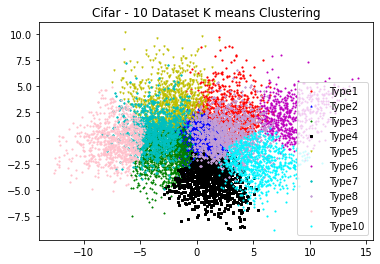

ASC: 0.055633247
dunn: 0.090204


In [1]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.metrics import pairwise_distances
from validclust import dunn

np.random.seed(20)

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points, distances 
 
 
#Load Data
#data = load_digits().data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)

x_train = np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)

train_data_final = []
for train_img in x_train:
    train_data_final.append(cv2.cvtColor(train_img, cv2.COLOR_RGB2GRAY))

test_data_final = []
for test_img in x_test:
    test_data_final.append(cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY))

train_data_final = np.array(train_data_final)
test_data_final = np.array(test_data_final)

train_data = train_data_final.reshape(50000,1024)
test_data = test_data_final.reshape(10000,1024)

data = test_data/255
pca = PCA(200)
  
#Transform the data
X = pca.fit_transform(data)
 
#Applying our function
y, dist = kmeans(X,10,100)
y = np.array(y)
dist = pairwise_distances(X, metric='euclidean')
 
#Visualize the results
u_labels = np.unique(y)
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1], label='Type1', c='r',marker='o', s=1.5)
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1], label='Type2', c='b',marker='^', s=1.5)
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1], label='Type3', c='green',marker='*', s=1.5)
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1], label='Type4', c='k',marker='s', s=1.5)
plt.scatter(X[np.where(y == 4)[0],0],X[np.where(y == 4)[0],1], label='Type5', c='y',marker='v', s=1.5)
plt.scatter(X[np.where(y == 5)[0],0],X[np.where(y == 5)[0],1], label='Type6', c='m',marker='p', s=1.5)
plt.scatter(X[np.where(y == 6)[0],0],X[np.where(y == 6)[0],1], label='Type7', c='c',marker='X', s=1.5)
plt.scatter(X[np.where(y == 7)[0],0],X[np.where(y == 7)[0],1], label='Type8', c='#C29ED6',marker='D', s=1.5)
plt.scatter(X[np.where(y == 8)[0],0],X[np.where(y == 8)[0],1], label='Type9', c='#FFC1CC',marker='8', s=1.5)
plt.scatter(X[np.where(y == 9)[0],0],X[np.where(y == 9)[0],1], label='Type10', c='#00F6FF',marker='H', s=1.5)

plt.title('Cifar - 10 Dataset K means Clustering')


'''
for i in u_labels: 
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
'''
plt.legend()
plt.show()
 

#print(sklearn.metrics.davies_bouldin_score(df,label))
print("ASC:",sklearn.metrics.silhouette_score(X, y, metric='euclidean')) #expected: 0.054
print("dunn:", dunn(dist, y)) #expected: 0.089


### Part 2: Auto - Encoder Implementation

In [ ]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.metrics import pairwise_distances
from validclust import dunn
import keras

np.random.seed(20)

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points, distances 
 
 
#Load Data
#data = load_digits().data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)

x_train = np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)

#Converting train set images to grayscale
train_data_final = []
for train_img in x_train:
    train_data_final.append(cv2.cvtColor(train_img, cv2.COLOR_RGB2GRAY))

#Converting test set images to grayscale
test_data_final = []
for test_img in x_test:
    test_data_final.append(cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY))

train_data_final = np.array(train_data_final)
test_data_final = np.array(test_data_final)

#Normalizing the datasets
train_data_final = train_data_final/255
test_data_final = test_data_final/255

#Encoding
encoder_input = keras.Input(shape=(32, 32, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#Decoding
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(1024, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((32, 32, 1))(x)

#Optimization
opt = tf.keras.optimizers.Adam(lr=0.001, decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()
autoencoder.compile(opt, loss='mse')

epochs = 3

for epoch in range(epochs):

    history = autoencoder.fit(
      train_data_final,
      train_data_final,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")


encoding = encoder.predict([ train_data_final.reshape(50000, 32, 32, 1) ])
encoding = np.array(encoding)

X = encoding
y, dist = kmeans(X,10,100)
y = np.array(y)
dist = pairwise_distances(X, metric='euclidean')
 
#Visualize the results
u_labels = np.unique(y)
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1], label='0', c='r',marker='o', s=2)
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1], label='1', c='b',marker='^', s=2)
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1], label='2', c='green',marker='*', s=2)
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1], label='3', c='k',marker='s', s=2)
plt.scatter(X[np.where(y == 4)[0],0],X[np.where(y == 4)[0],1], label='4', c='y',marker='v', s=2)
plt.scatter(X[np.where(y == 5)[0],0],X[np.where(y == 5)[0],1], label='5', c='m',marker='p', s=2)
plt.scatter(X[np.where(y == 6)[0],0],X[np.where(y == 6)[0],1], label='6', c='c',marker='X', s=2)
plt.scatter(X[np.where(y == 7)[0],0],X[np.where(y == 7)[0],1], label='7', c='#C29ED6',marker='D', s=2)
plt.scatter(X[np.where(y == 8)[0],0],X[np.where(y == 8)[0],1], label='8', c='#FFC1CC',marker='8', s=2)
plt.scatter(X[np.where(y == 9)[0],0],X[np.where(y == 9)[0],1], label='9', c='#00F6FF',marker='H', s=2)

plt.title('Cifar - 10 Dataset K means Clustering')
plt.legend()
plt.show()
 
print("ASC:",sklearn.metrics.silhouette_score(X, y, metric='euclidean')) #expected: 0.054
print("dunn:", dunn(dist, y)) #expected: 0.089

C:\Users\ADELINE GRACE\.conda\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              66560     
_________________________________________________________________
reshape (Reshape)            (None, 32, 32, 1)         0         
Total params: 136,320
Trainable params: 136,320
Non-trainable params: 0
_________________________________________________